<a href="https://colab.research.google.com/github/stefanlessmann/ASE-ML/blob/main/Day-3-Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wecome to our Section 12 Deep Learning Practice Session
Today, we put everything together studied thus far and develop a fully-fledged pipeline for training, testing, and model selecting a neural network classifier to predict the risk of credit default. 

The outline of today's session is as follows:
- Load real-world credit data from GitHub
- Eyeballing the data using the `Pandas` library
- Perform basic data preprocessing
- Partition the data into training a testing data
- Train and assess a neural network classifier. For assessment, compute the classification accuracy of your trained network.
- Optional task for expert: Tuning the architecture of the neural network

Much work to do, so let's go!


In [1]:
# Standard libraries for data data handling and plotting
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Load real-world credit data from GitHub
The data set we use for this session is available at the following URL: <br>
https://raw.githubusercontent.com/stefanlessmann/ASE-ML/master/hmeq.csv

Create a variable named `data_url` in which you store this URL. Next, use the method `read_csv()` from the `Pandas` library to download the data right from the web and store it in a `DataFrame`. 

In [2]:
# Enter code to download the demo data set from the web 
data_url = "https://raw.githubusercontent.com/stefanlessmann/ASE-ML/master/hmeq.csv"
df = pd.read_csv(data_url)

# Taking a first glance at the data
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


#### Introducing the HMEQ data set (you can skip this section)
Our data set, called the  "Home Equity" or, in brief, HMEQ data set, is provided by www.creditriskanalytics.net. It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called 'BAD' is  provided and indicates whether a borrower has repaid her/his debt. You can think of the data as a standard use case of binary classification.

You obtain the data, together with other interesting finance data sets, directly from www.creditriskanalytics.net. The website also provides a brief description of the data set. Specifically, the data set consists of 5,960 observations and 13 features including the target variable. The variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

As you can see, the features aim at describing the financial situation of a borrower. We will keep using the data set for many modeling tasks in this demo notebook and future demo notebook. So it makes sense to familiarize yourself with the above features. Make sure you understand what type of information they provide and what this information might reveal about the risk of defaulting.  

## Eyeballing data using the Pandas library
In this part, we briefly demonstrate some practices for obtaining a first intuition about a data set. Let's first identify some standard methods that the `Pandas` library provides for this purpose. This is not meant to give you a fully-comprehensive list. With that disclaimer, however, it is fair to say that you will apply all of the following methods to a new data frame.  
- `info()` 
- `describe()`
- `head()` / `tail()`

Try them out and inspect the output. Briefly summarize your findings.

In [3]:
# Standard methods to exploring a DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [5]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


Creating outputs in the form of lists and tables is fine and can provide useful insights. However, you probably know the saying "*a picture says more than a thousand words*". Suitable graphics are often more insightful than (big) tables and can convey information in a more accessible way. Fortunately, `Pandas` offers many useful features to visualize the data within a DataFrame.

Try  accomplish the following tasks. Web search using competendly selected search phrases will easily reveal the `Pandas` methods you need and how these are invoked. 
- Create a *histogram* for the the dependent (aka target) variable **BAD**
- Create a density plot to depict the distribution of the variable **LOAN**
- It is more common to visualize the distribution of numerical variables using *boxplots*. Considering again the variable, **LOAN** and depict its distribution using a *boxplot*
- Create one last boxplot of the variable **LOAN**. This time, depict the distribution of loan amounts seperately for good and bad borrowers. To that end, use the target variable **BAD** and use it to add a grouping to your boxplot.

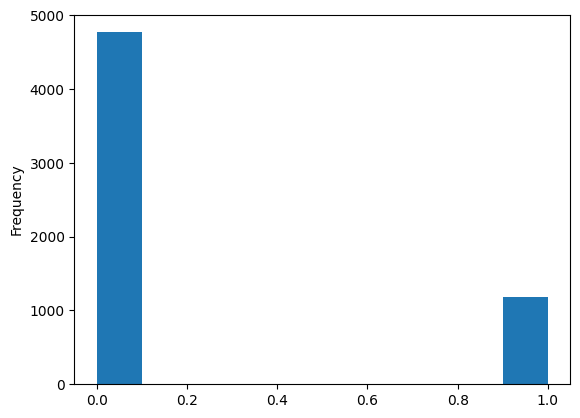

In [6]:
# Create a histogram for the the dependent (aka target) variable BAD
df["BAD"].plot.hist();

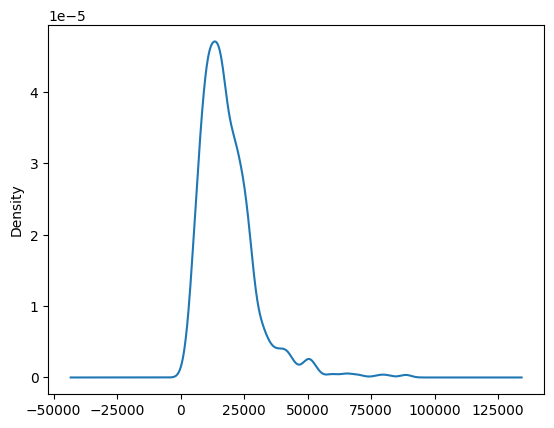

In [7]:
# Create a density plot to depict the distribution of the variable LOAN
df['LOAN'].plot.density();

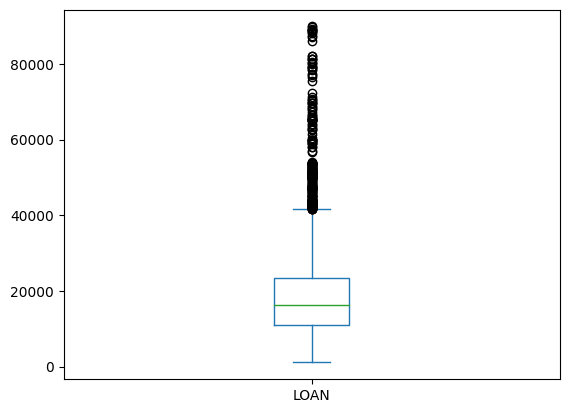

In [8]:
# Create a box plot to depict the distribution of the variable LOAN
df['LOAN'].plot.box();

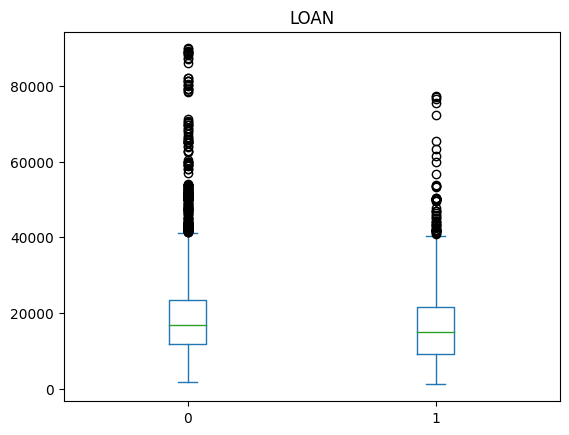

In [9]:
# Create a box plot of the variable LOAN while grouping by the target
df.plot.box(by="BAD", column="LOAN");

## Perform basic data preprocessing
Data preparation is a topic of great importance. We could easily devote an entire lecture to this topic. Below, we sketch only a tiny little bit of the tasks typically performed in the scope of data preparation. 

In fact, we could not proceed with the data in its present form. For example, going back to the tabular preview of our data, you might notice that several variables show some missing values (denoted as NaN for *not a number* in the preview*). Leaving those missing values w/o treatment would break our neural network.

Similarly, the data preview highlights that different variables show substantialyl different value ranges. Simply compare the values (or descriptive statistics also shown above) of the variables **LOAN** to those of **VALUE** to see this. For example, the maximal value of the variable **LOAN** is 89.900,00 whreas the largest value for the variable **VALUE** is 855.909,00 so almost ten times bigger. Differences in the value range of variables are normal but, unless suitably treated in data prepration, will also harm our neural network. 

Last, the data set includes some categorical variables. These would also need special treatment, which we do not have the time to detail. Thus, we simply delete them.

In sum, we need to accomplish the following tasks:
- Deleting the categorical variables **REASON** and **JOB**
- Replacing all missing values in the data using *mean imputation*
- Transforming the value range of all variables such that values are scaled between zero and one.

Let's go...

In [10]:
# Delete selected columns
df = df.drop(columns=["REASON", "JOB"], axis=1)
df.info() # verify the columns are no longer part of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   YOJ      5445 non-null   float64
 5   DEROG    5252 non-null   float64
 6   DELINQ   5380 non-null   float64
 7   CLAGE    5652 non-null   float64
 8   NINQ     5450 non-null   float64
 9   CLNO     5738 non-null   float64
 10  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 512.3 KB


In [11]:
# Replace missing values in a column with the mean of that column 
df = df.fillna(value=df.mean())
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


In [12]:
# Scale value ranges of variables to zero and one
# REMARK: it is important we perform this operation only on the dependent 
#         variables and not on the dependent variable. Our target variable
#         remains unchanged. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

# Remove the target variable so that it remains unchanged
y = df.pop("BAD")

# Scale the remaining columns
# We also create a new DataFrame to store the transformed data. 
# This is because our scaler does not alter the original data but
# first creates a copy of the data and then transforms this copy.  
df_ready = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Verify our transformed data shows the same value ranges for all columns
df_ready.describe()  # We reuse the method .describe(), which computes min/max values for each column

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.197162,0.180378,0.110597,0.217616,0.025457,0.029963,0.153879,0.069768,0.299945,0.163991
std,0.126210,0.106875,0.067040,0.176568,0.079420,0.071400,0.071529,0.097238,0.140117,0.037639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112613,0.115918,0.068981,0.073171,0.000000,0.000000,0.100469,0.000000,0.211268,0.149115
50%,0.171171,0.169731,0.096708,0.195122,0.000000,0.000000,0.152432,0.058824,0.295775,0.163991
75%,0.250000,0.216705,0.130916,0.292683,0.000000,0.029963,0.194433,0.117647,0.366197,0.184555
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



## Partition the data into training a testing data
Data partitioning is standard practice to ensure we use disjoint data for training and evaluating a machine learning model. 

the `sklearn` library provides many methods to partition data for standard machine learning workflows. Arguably, the easiest approach is to use the method `train_test_split()`. Check out its documentation and partition our *prepared* data. Let's say we use 30% of the data for testing and the rest for training.

In [13]:
from sklearn.model_selection import train_test_split

test_fraction = 0.3  # Let's say we use 30% of the data for testing

Xtrain, Xtest, ytrain, ytest = train_test_split(df_ready, y, test_size=test_fraction)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)  

(4172, 10) (1788, 10) (4172,) (1788,)


## Train and assess a neural network classifier
Finally, we come to the point where neural networks come in. In fact, the following exercise of training and assessing a classifier will look pretty much the same with any learning algorithm. That is one of the nice features of the `sklearn` library. It offers a consistent interface to many different learning algorithms. This way, we can easily switch from one learning algorithm to another if we like. For now, however, we focus on neural networks. 

Here is the chain to tasks we need to perform
- Import relevant libraries to train a neural network classifier
- Train our NN classifier using the training data
- Compute NN predictions for the test data
- Compute a performance indicator over the test set predictions. 


In [14]:
# Import relevant libraries to train a neural network classifier
from sklearn.neural_network import MLPClassifier

# Train our NN classifier using the training data
nn = MLPClassifier(max_iter=500, hidden_layer_sizes=(3,), random_state=123)
nn.fit(Xtrain, ytrain)

# Compute NN predictions for the test data
yhat = nn.predict(Xtest)

# Compute a performance indicator over the test set predictions. 
perf = nn.score(X=Xtest, y=ytest)  # The easiest way to compute performance using a default indicator
print("Classification accuracy: ", perf)


Classification accuracy:  0.8204697986577181


In [15]:
# A more informative way to assess the NN involves creating a cross-table of
# its predictions and the true classes of test set observations.
# An easy - quick and dirty - way to do this is as follows
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=ytest, y_pred=yhat)

array([[1362,   49],
       [ 272,  105]])

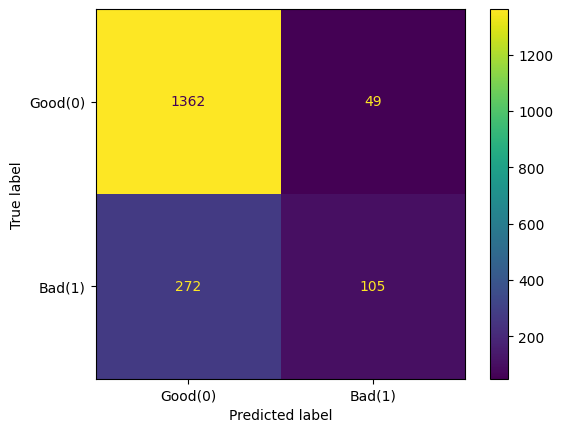

In [16]:
# A nice visualization of the so-called confusion matrix can be produced as follows
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=ytest, y_pred=yhat, labels=[0, 1], display_labels=['Good(0)', 'Bad(1)']);


## Optional task for expert: Tuning the architecture of the neural network
Try to improve your NN classifier by systematically evaluating alternative network architectures. For example, you can consider networks with different numbers of layers and different numbers of nodes in those layers. 

In fact, there are many other configuration options (called meta-parameters) you could consider, as we discussed in the lecture. The point of this task is not to find the best NN classifier for our specific data set. Rather, the point is to familiarize you with relevant libraries and methods to carry out such tuning tasks using Python. In the lecture, we introduced the concept of *grid search*. Time to run a web search for, e.g., "sklearn grid search" and see what it produces ;) 

In [24]:
# Trying to improve our NN by grid searching meta-parameter options
from sklearn.model_selection import GridSearchCV
print('Tuning neural network classifier')

# Define meta-parameter grid of candidate settings
# The following settings are just for illustration
candidate_settings = {'hidden_layer_sizes': [(3,), (5,)]}

# This is an example for a comprehensive grid search over many candidate neural
# network architectures. Be careful with running this code as it will take some
# time to execute (e.g., ~40 min) 
candidate_settings_big = {'hidden_layer_sizes': [(3,), (5,), (25,),(50,), (100,),
                                             (5,2), (25,5), (50,7), (100,10), 
                                             (100,10, 3)],
                      "activation": ["logistic", "tanh", "relu"],
                      "learning_rate_init": [0.01, 0.001],
                      "solver": ["sgd", "adam"],
                      "early_stopping": [True, False]

              }
# For your information, this is the best configuration coming out of the 
# comprehensive grid search 
# MLPClassifier(hidden_layer_sizes=(100, 10), learning_rate_init=0.01, max_iter=1000)

# Train one NN for each candidate setting and assess the model
gs_nn = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid=candidate_settings, verbose=3)
gs_nn.fit(Xtrain, ytrain)

# Print which configuration gave the best performance
print("Best configuration: ", gs_nn.best_estimator_)

Tuning neural network classifier
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(3,), learning_rate_init=0.01, solver=sgd;, score=0.805 total time=   0.2s
[CV 2/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(3,), learning_rate_init=0.01, solver=sgd;, score=0.805 total time=   0.2s
[CV 3/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(3,), learning_rate_init=0.01, solver=sgd;, score=0.806 total time=   0.2s
[CV 4/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(3,), learning_rate_init=0.01, solver=sgd;, score=0.806 total time=   0.2s
[CV 5/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(3,), learning_rate_init=0.01, solver=sgd;, score=0.806 total time=   0.1s
[CV 1/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(3,), learning_rate_init=0.01, solver=adam;, score=0.805 total time=   0.2s
[CV 2/5]

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   0.2s
[CV 2/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rate_init=0.001, solver=sgd;, score=0.805 total time=   0.2s
[CV 3/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rate_init=0.001, solver=sgd;, score=0.806 total time=   0.2s
[CV 4/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rate_init=0.001, solver=sgd;, score=0.806 total time=   0.2s
[CV 5/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rate_init=0.001, solver=sgd;, score=0.806 total time=   0.2s
[CV 1/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rate_init=0.001, solver=adam;, score=0.805 total time=   0.2s
[CV 2/5] END activation=logistic, early_stopping=True, hidden_layer_sizes=(25,), learning_rat

0.8691275167785235


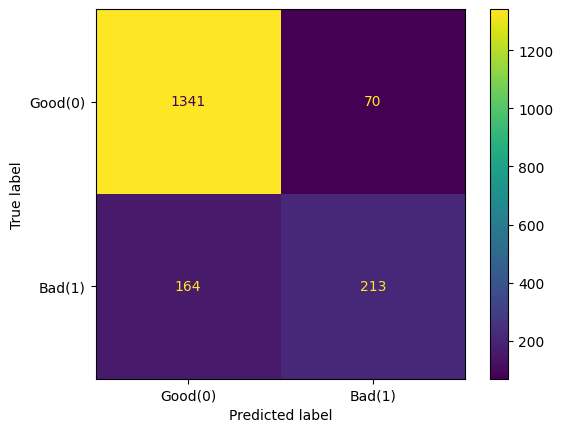

In [25]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_nn, X=Xtest, y=ytest, labels=[0, 1], display_labels=['Good(0)', 'Bad(1)']);
print(gs_nn.score(Xtest, ytest))